# **Τεχνικές Εξόρυξης Δεδομένων - Εργασία 1** <br> 

---


Κωστής Μαϊδάτσης (1115201800102) <br> Διονύσιος Μανιατάκος (1115201800104)

## **Ερωτήματα**

### **Εισαγωγή Δεδομένων**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


### **Ερώτημα 1**

There are more movies than TV shows (5377 movies, 2410 TV Shows)


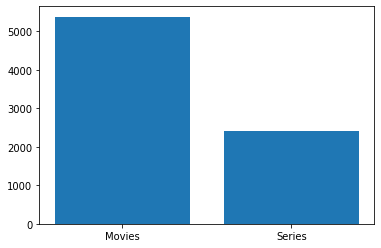

In [8]:
def print_most_popular_type(df, title):
  most_popular_type = df.type.value_counts()
  movie_amount = most_popular_type.get('Movie')
  shows_amount = most_popular_type.get('TV Show')
  if movie_amount > shows_amount:
    print("There are more movies than TV shows (" + str(movie_amount) + " movies, " + str(shows_amount) + " TV Shows)")
  else:
    print("There are more TV Shows than movies (" + str(movie_amount) + " movies, " + str(shows_amount) + " TV Shows)")
  plt.bar(['Movies', 'Series'], [movie_amount, shows_amount])
  plt.title(title)
  plt.show()

print_most_popular_type(netflix_data, "")

### **Ερώτημα 2**

There are more movies than TV shows (5016 movies, 2173 TV Shows)


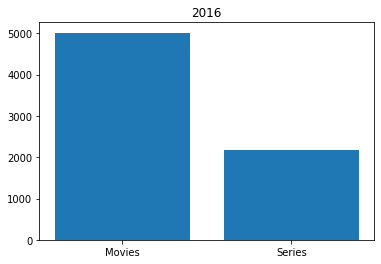

There are more movies than TV shows (4152 movies, 1812 TV Shows)


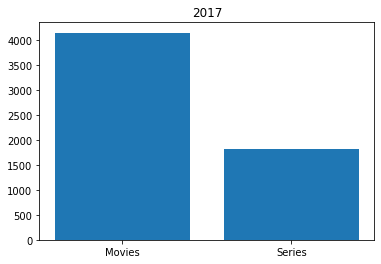

There are more movies than TV shows (2897 movies, 1382 TV Shows)


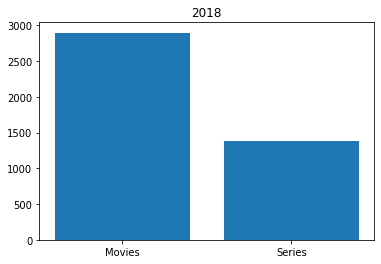

There are more movies than TV shows (1400 movies, 726 TV Shows)


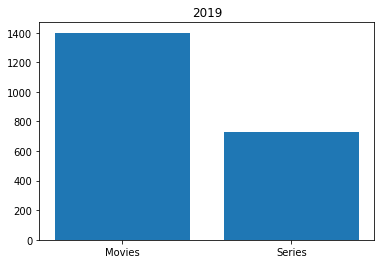

In [9]:
def print_most_popular_type_in_year(df, year):
  year_df = df[df['date_added'].notnull()]
  year_df = year_df[year_df['date_added'].str.split(', ', expand=True)[1].astype(int) > year].reset_index()
  print_most_popular_type(year_df, str(year))

print_most_popular_type_in_year(netflix_data, 2016)
print_most_popular_type_in_year(netflix_data, 2017)
print_most_popular_type_in_year(netflix_data, 2018)
print_most_popular_type_in_year(netflix_data, 2019)


### **Ερώτημα 3**

Most popular country is United States with 3296 titles.


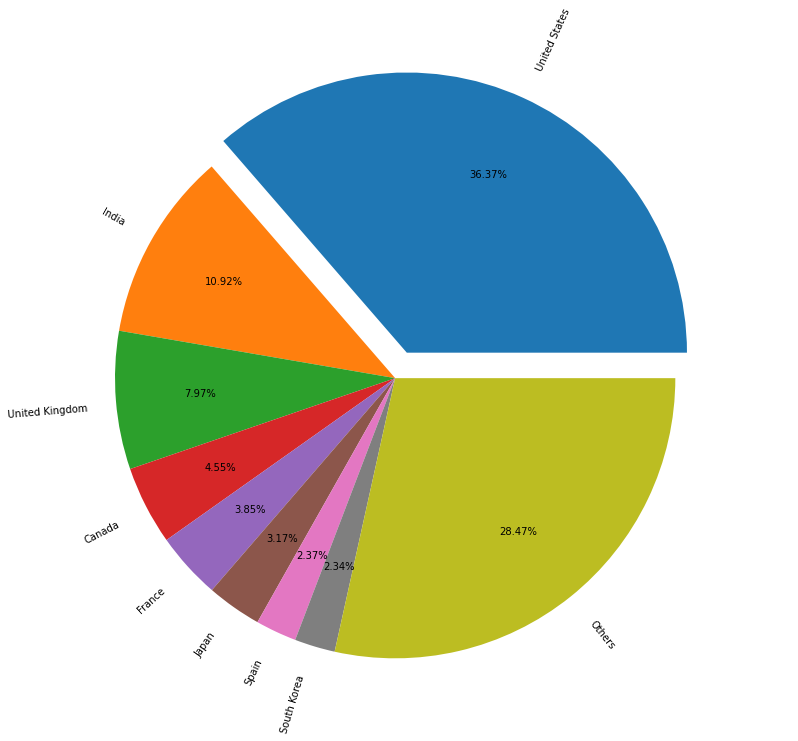

In [10]:
def seperateCommas(expression):
  return expression.split(', ')

def print_most_popular_country(df):
  countries = df.country.dropna().values
  titles_by_country = {}

  for c in countries:
    for item in seperateCommas(c):
      if item not in titles_by_country.keys():
        titles_by_country[item] = 1
      else:
        titles_by_country[item] = titles_by_country[item] + 1

  most_popular_country = max(titles_by_country, key=titles_by_country.get)
  print("Most popular country is " + str(most_popular_country) + " with " + str(titles_by_country[most_popular_country]) + " titles.")

  countries_list = []
  titles_list = []

  for x, y in titles_by_country.items():
      countries_list.append(x)
      titles_list.append(y)
  zipped = list(zip(countries_list, titles_list))
  zipped = sorted(zipped,key=lambda val: -val[1])
  
  countries_list, titles_list = list(zip(*zipped))
  countries_list = list(countries_list)
  titles_list = list(titles_list)

  countries_pie = countries_list[:8].copy()
  titles_pie = titles_list[:8].copy()
  explode = (0.1,0,0,0,0,0,0,0,0)

  countries_pie.append('Others')
  titles_pie.append(sum(titles_list[8:]))
  figure(figsize=(14, 12))
  plt.pie(titles_pie, labels=countries_pie,explode=explode, autopct='%.2f%%',pctdistance=0.7,rotatelabels=True,)
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.show()
  
print_most_popular_country(netflix_data)

### **Ερώτημα 4**

In [11]:
def titles_in_category(df, category):
  filtered_data = df[df['listed_in'].notnull()]
  return filtered_data.loc[filtered_data['listed_in'].apply(lambda x: True if category in seperateCommas(x) else False)]

def titles_in_country(df, country):
  filtered_data = df[df['country'].notnull()]
  return filtered_data.loc[filtered_data['country'].str.contains(country)]

def unique_items(df):
  raw_items = df.dropna().values
  items = []

  for c in raw_items:
    for item in seperateCommas(c):
      if item not in items:
        items.append(item)
  return items

def all_categories(df):
  return unique_items(df.listed_in)


countries = unique_items(netflix_data.country)

countries_categories = pd.DataFrame(columns = countries, index = all_categories(netflix_data))
countries_categories.head(200)

for country in countries:
  country
  all_categories_per_country = all_categories(titles_in_country(netflix_data, country))
  for listing in all_categories_per_country:
    countries_categories[country][listing] = '✓'

countries_categories = countries_categories.fillna(' ')
countries_categories.head(50)

,Brazil,Mexico,Singapore,United States,Turkey,Egypt,India,Poland,Thailand,Nigeria,Norway,Iceland,United Kingdom,Japan,South Korea,Italy,Canada,Indonesia,Romania,Spain,South Africa,France,Portugal,Hong Kong,China,Germany,Argentina,Serbia,Denmark,Kenya,New Zealand,Pakistan,Australia,Taiwan,Netherlands,Philippines,United Arab Emirates,Iran,Belgium,Israel,...,Cambodia,Albania,Cuba,Nicaragua,Greece,"Cambodia,",Croatia,Guatemala,West Germany,"Poland,",Slovenia,Dominican Republic,Nepal,Samoa,Azerbaijan,Bermuda,Ecuador,Georgia,Botswana,Puerto Rico,Iraq,Vatican City,Angola,Ukraine,Jamaica,Belarus,Cyprus,Kazakhstan,Malawi,Slovakia,Lithuania,Afghanistan,Paraguay,Somalia,Sudan,Panama,"United Kingdom,",Uganda,East Germany,Montenegro
International TV Shows,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,,✓,✓,✓,,✓,✓,✓,✓,,✓,,✓,✓,✓,✓,✓,✓,✓,,✓,✓,...,,,✓,,✓,,✓,,✓,✓,,,,,✓,,,,,✓,,,,✓,,,,,,,,,,,,,✓,,,
TV Dramas,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,,✓,✓,✓,,✓,✓,✓,✓,,✓,,✓,✓,✓,✓,✓,✓,✓,,✓,✓,...,,,,,,,✓,,✓,✓,,,,,✓,,,,,,,,,✓,,,,,,,,,,,,,✓,,,
TV Sci-Fi & Fantasy,✓,✓,✓,✓,,✓,✓,,✓,,,,✓,,,,✓,,,,,✓,,,✓,✓,,,,,✓,,✓,✓,,,,,✓,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,✓,,,
Dramas,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,...,✓,✓,,,✓,✓,✓,✓,,✓,✓,,✓,,,,,✓,,,,,,,✓,,,,✓,✓,✓,,,✓,✓,,✓,,,✓
International Movies,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,...,✓,✓,,,✓,✓,✓,✓,✓,✓,✓,✓,✓,,,,,✓,,,✓,✓,✓,✓,✓,,,,,✓,✓,✓,✓,,,,✓,,,✓
Horror Movies,,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,,✓,✓,✓,,,✓,✓,✓,✓,,,,✓,✓,✓,,✓,✓,✓,✓,✓,...,,,,,,,,,✓,✓,✓,✓,,,,,,,,,,,,,,,,,,,,,,,,,✓,,,
Action & Adventure,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,,✓,✓,✓,,✓,✓,✓,✓,✓,✓,,✓,✓,✓,✓,✓,✓,✓,,✓,✓,...,✓,,,,✓,,,,,,,,✓,,,,,,,,,,✓,,,,,,,,,,✓,,,,✓,,,
Independent Movies,✓,✓,✓,✓,✓,✓,✓,✓,,✓,✓,✓,✓,✓,✓,✓,✓,,,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,...,,,,,✓,,✓,✓,,✓,✓,,,,,,,✓,,,,,,,,,,,✓,,,,,,,,✓,,,
Sci-Fi & Fantasy,,✓,✓,✓,,,✓,✓,,,,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,✓,,✓,✓,✓,✓,✓,,,✓,,✓,,✓,,✓,,✓,✓,...,✓,,,,✓,,,,,✓,✓,,,,,,,,,,,,,,,,,,,,,,,,,,✓,,,
TV Mysteries,✓,,,✓,✓,✓,✓,✓,✓,,✓,,✓,✓,✓,,✓,,,,✓,✓,,,✓,✓,,,✓,,,,✓,✓,,,,,✓,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,✓,,,


### **Ερώτημα 5**

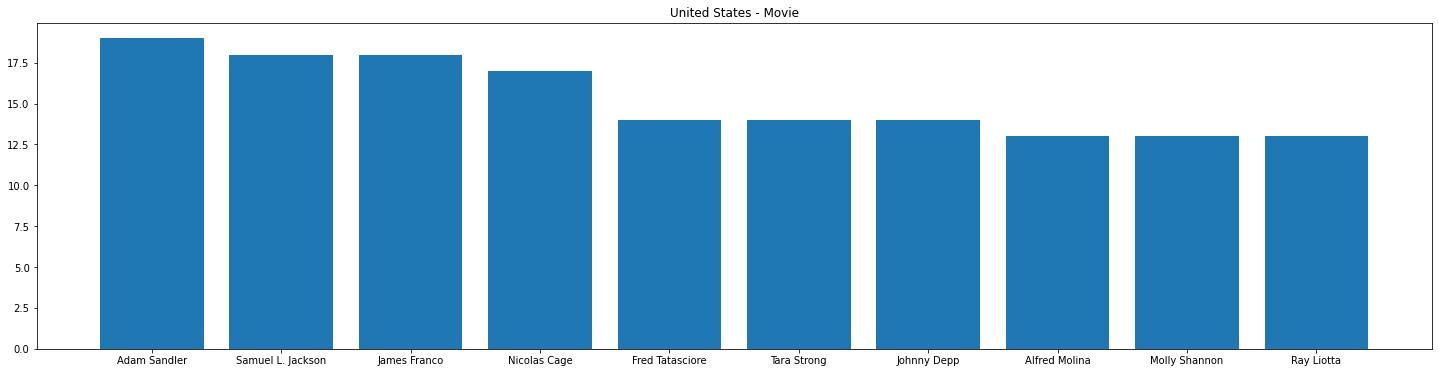

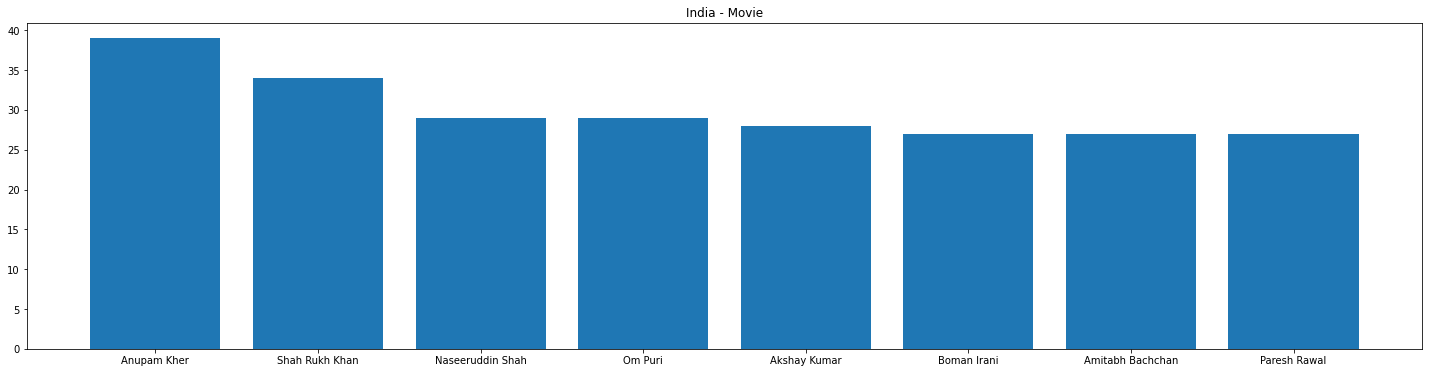

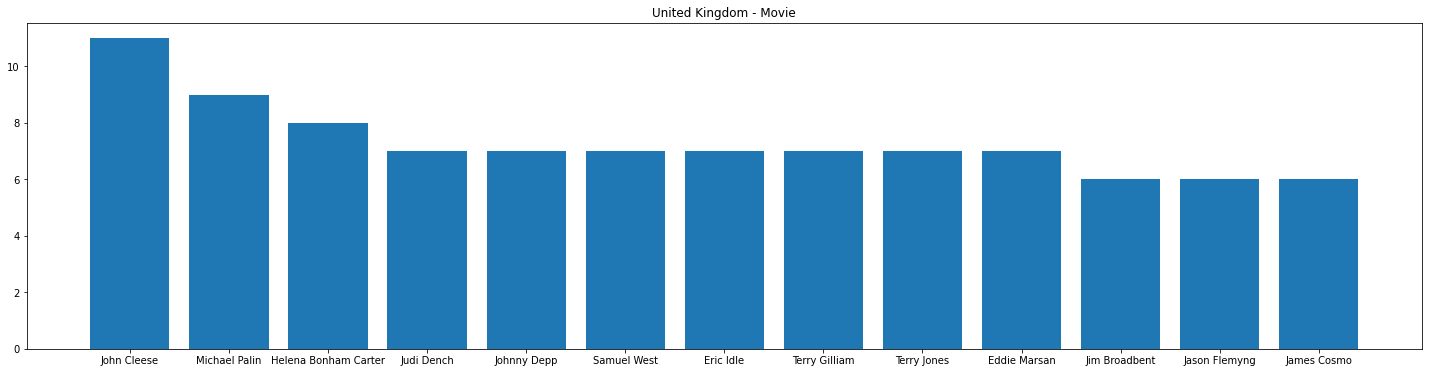

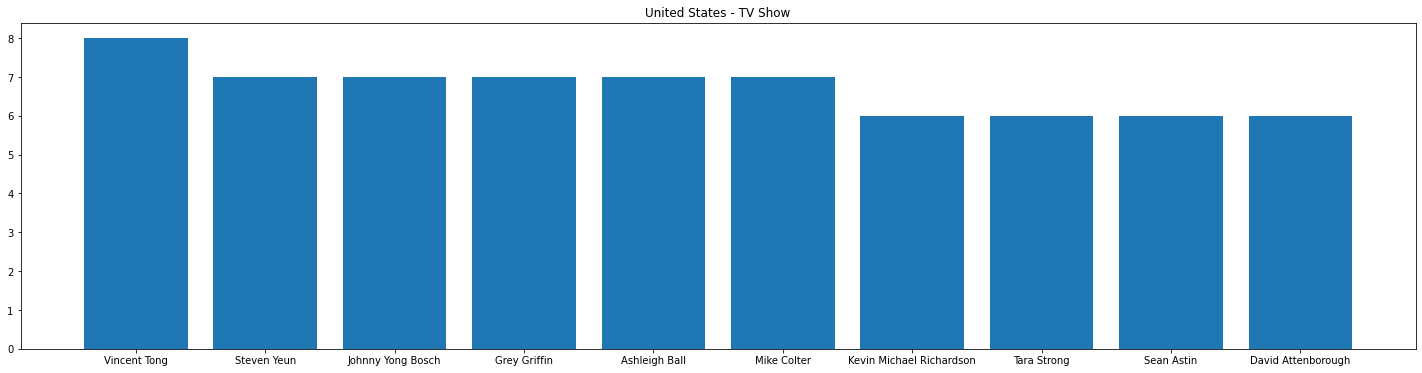

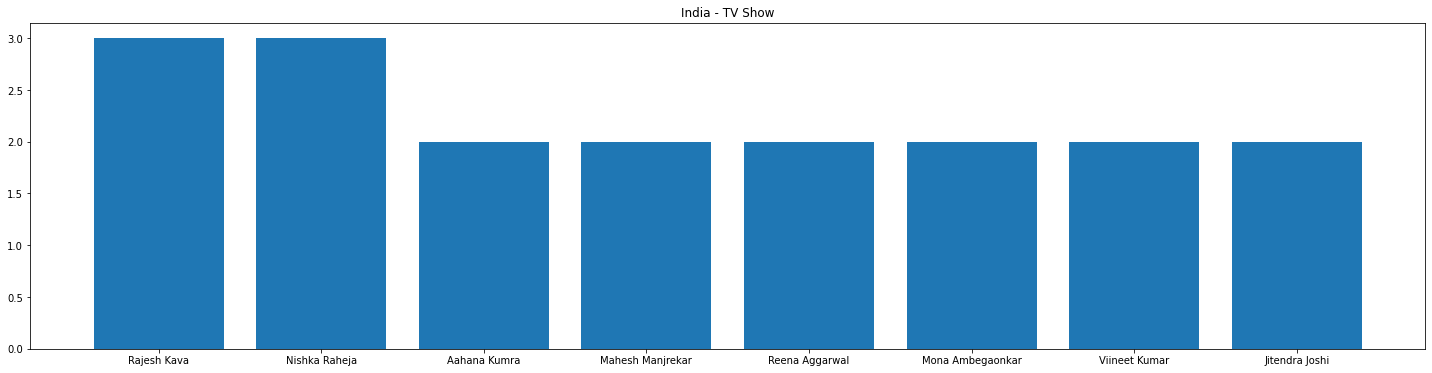

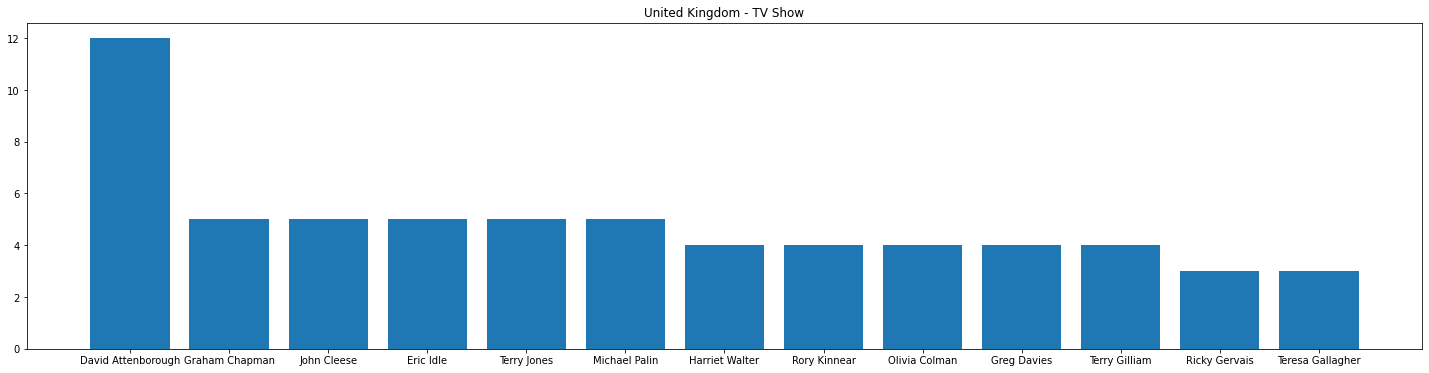

In [24]:
def most_popular_actors(df, n):
  actors = {}

  casts = df['cast']
  casts = casts.dropna()
  for c in casts:
    for actor in seperateCommas(c):
      if actor not in actors.keys():
        actors[actor] = 1
      else:
        actors[actor] +=1 
  actors = sorted(actors.items(), key=lambda x: -x[1])
  return actors[:n]

def plot_most_popular_actors(df,n, country, type):
  df = df[df.type == type]
  actors_tuple = most_popular_actors(df,n)
  if(len(actors_tuple)==0):
    print('No actors found')
    return
  actors, listings = map(list, zip(*actors_tuple))
  figure(figsize=(25, 6))
  plt.title(country + " - " + type)
  plt.bar(actors, listings)

def plot_most_popular_actors_per_coutry(df, country, n, type):
  plot_most_popular_actors(titles_in_country(df, country), n, country, type)  


plot_most_popular_actors_per_coutry(netflix_data, 'United States', 10, 'Movie')
plot_most_popular_actors_per_coutry(netflix_data, 'India', 8, 'Movie')
plot_most_popular_actors_per_coutry(netflix_data, 'United Kingdom', 13, 'Movie')

plot_most_popular_actors_per_coutry(netflix_data, 'United States', 10, 'TV Show')
plot_most_popular_actors_per_coutry(netflix_data, 'India', 8, 'TV Show')
plot_most_popular_actors_per_coutry(netflix_data, 'United Kingdom', 13, 'TV Show')


### **Ερώτημα 6**

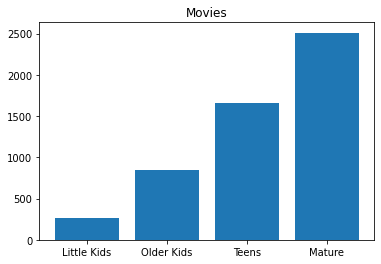

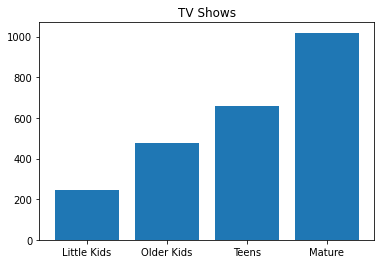

In [13]:
import matplotlib.pyplot as plt

def plot_age_groups(df,title):
  little_kids = df[(df['rating']=='G')       |
                   (df['rating']=='TV-Y')    | 
                   (df['rating']=='TV-G')]

  older_kids = df[(df['rating']=='PG')       |
                  (df['rating']=='TV-Y7')    |
                  (df['rating']=='TV-Y7-FV') |
                  (df['rating']=='TV-PG')]

  teens = df[(df['rating']=='PG-13')         |
             (df['rating']=='TV-14')]

  mature = df[(df['rating']=='R')            |
              (df['rating']=='NC-17')        | 
              (df['rating']=='TV-MA')]

  labels = ['Little Kids', 'Older Kids', 'Teens', 'Mature']
  values = [little_kids.shape[0] - 1, older_kids.shape[0] - 1, teens.shape[0] - 1, mature.shape[0] - 1]

  plt.title(title)
  plt.bar(labels,values)
  plt.show()

plot_age_groups(netflix_data[netflix_data['type'] == 'Movie'],'Movies')
plot_age_groups(netflix_data[netflix_data['type'] == 'TV Show'],'TV Shows')

### **Ερώτημα 7**

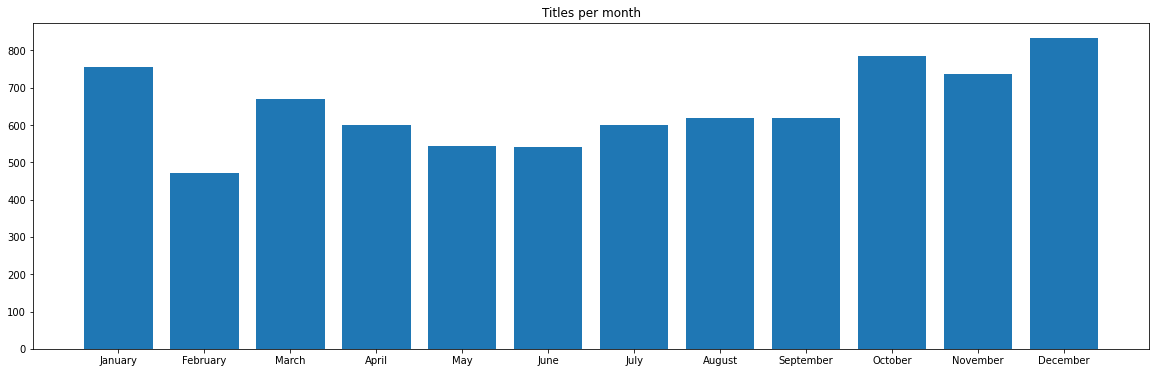

In [14]:
def plot_month_popularity(df):
  test = df.groupby(df['date_added'].str.split().str[0])
  a = test['date_added'].count()
  months = ['January','February','March','April','May','June','July','August','September','October','November','December']
  month_count = []
  for month in months:
    month_count.append(a.get(month))
  figure(figsize=(20, 6))
  plt.title('Titles per month')
  plt.bar(months, month_count)
  plt.show()

plot_month_popularity(netflix_data)

### **Ερώτημα 8**

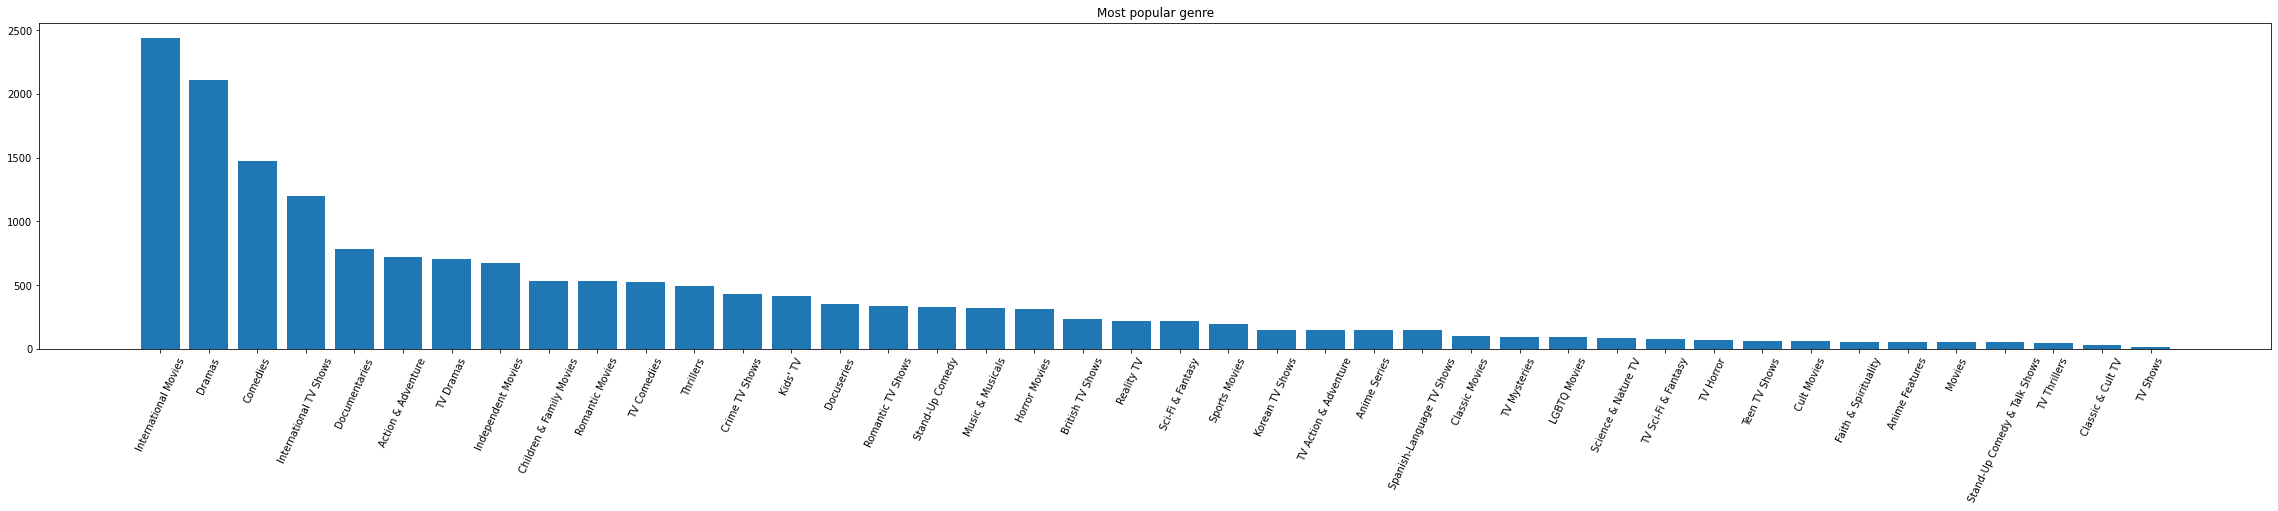

In [15]:
def plot_categories(df):
  categories = all_categories(df)
  categories_count = []
  for category in categories:
    categories_count.append(titles_in_category(df, category).shape[0] - 1)

  zipped = list(zip(categories, categories_count))
  zipped = sorted(zipped,key=lambda val: -val[1])
  categories,categories_count = list(zip(*zipped))
  
  figure(figsize=(40, 6))
  plt.title('Most popular genre')
  plt.bar(categories, categories_count)
  plt.xticks(rotation=65)
  plt.show()

plot_categories(netflix_data)

### **Ερώτημα 9**

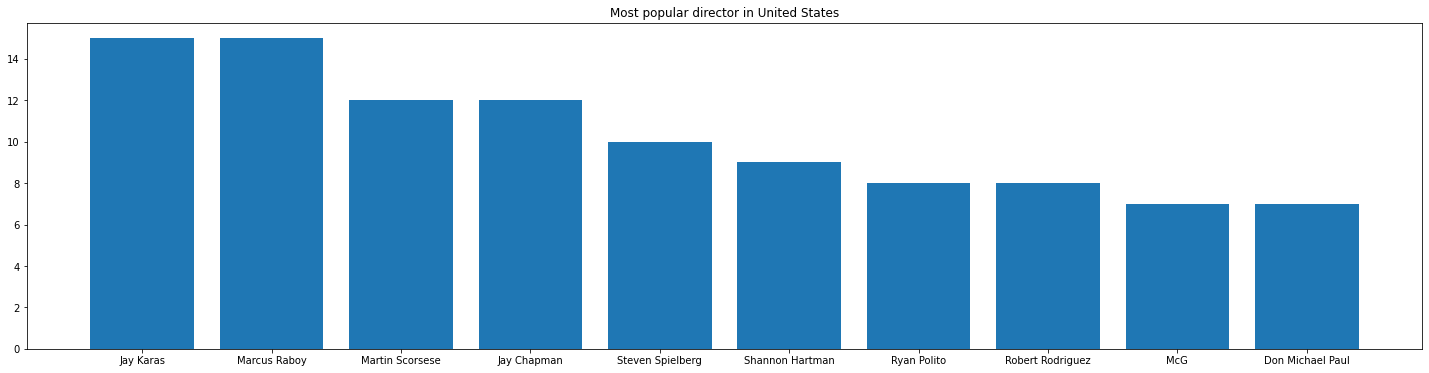

In [16]:
def most_popular_directors(df, n):
  directors_dict = {}

  directors = df['director']
  directors = directors.dropna()
  for d in directors:
    for director in seperateCommas(d):
      if director not in directors_dict.keys():
        directors_dict[director] = 1
      else:
        directors_dict[director] += 1 
  directors_list = sorted(directors_dict.items(), key=lambda x: -x[1])
  return directors_list[:n]

def plot_most_popular_directors(df,n, country):
  directors_tuple = most_popular_directors(df,n)
  if(len(directors_tuple)==0):
    print('No directors found')
    return
  directors, listings = map(list, zip(*directors_tuple))
  figure(figsize=(25, 6))
  plt.title('Most popular director in ' + country)
  plt.bar(directors, listings)

def plot_most_popular_directors_per_coutry(df, country, n):
  plot_most_popular_directors(titles_in_country(df, country), n, country)  


plot_most_popular_directors_per_coutry(netflix_data, 'United States', 10)

test = netflix_data[netflix_data['director'].notnull()]

### **Ερώτημα 10**

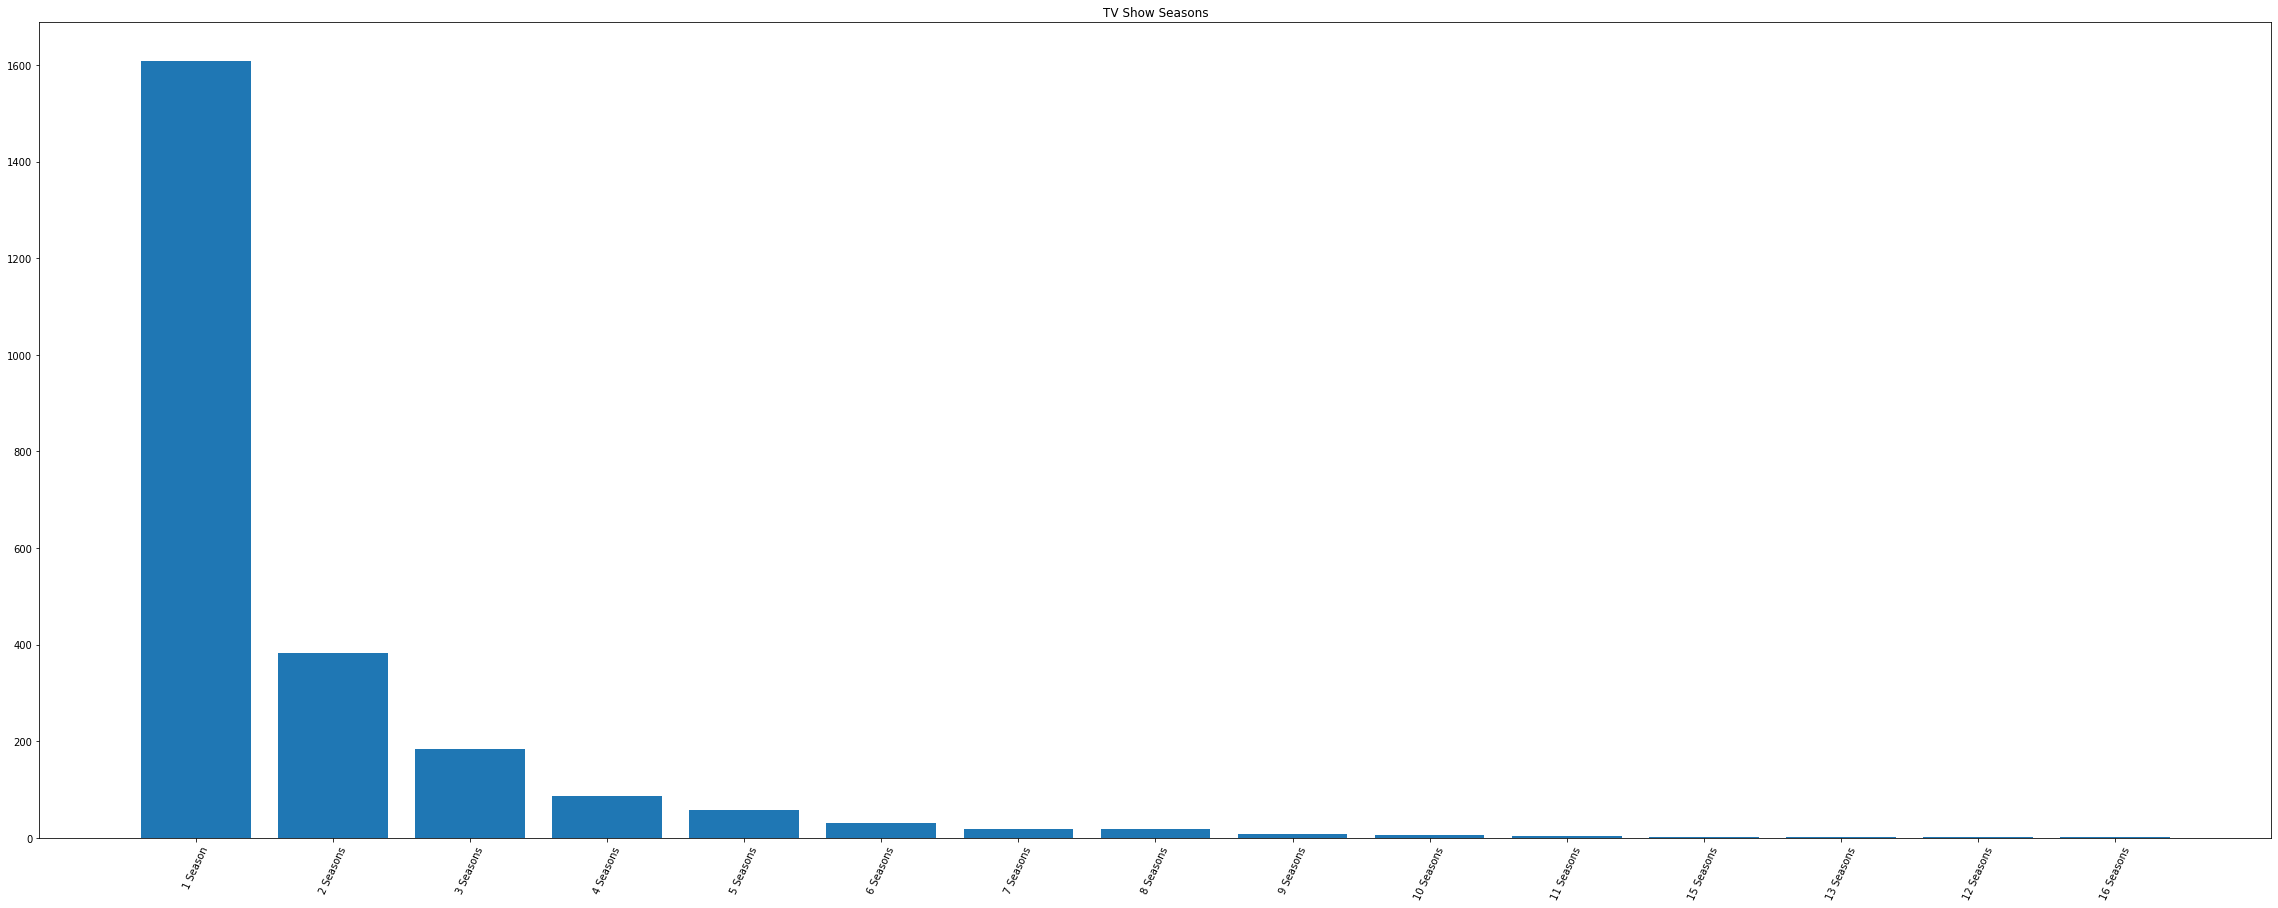

In [17]:
series = netflix_data[netflix_data['type']=='TV Show']
series = series[series['duration'].notnull()]
series = series.groupby('duration').count()
series = series['show_id']

series = series.sort_values(ascending=False)

num_of_seasons = series.index.to_list()
count = series.to_list()


figure(figsize=(40, 15))
plt.title('TV Show Seasons')
plt.bar(num_of_seasons, count)
plt.xticks(rotation=65)
plt.show()

### **Ερώτημα 11**

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<BarContainer object of 20 artists>

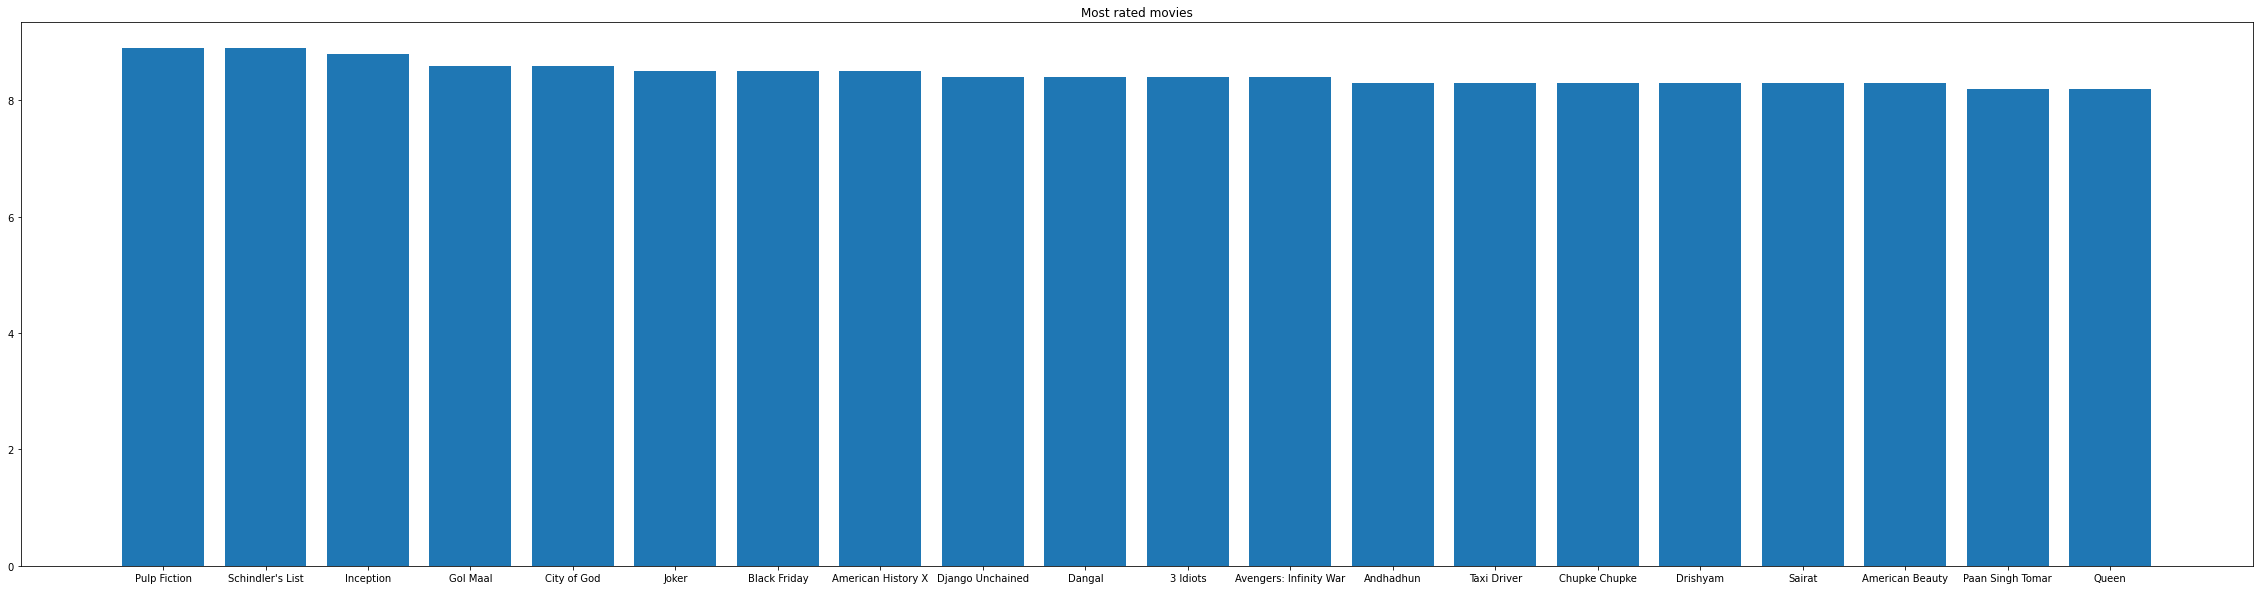

In [18]:
imdb_data = pd.read_csv("IMDb movies.csv")
imdb_ratings = pd.read_csv("IMDb ratings.csv")

imdb_data_ratings = pd.merge(imdb_data, imdb_ratings, how="left", on=["imdb_title_id", "imdb_title_id"])
imdb_data_ratings = imdb_data_ratings[['imdb_title_id','title','weighted_average_vote','total_votes']]
imdb_data_ratings.sort_values('weighted_average_vote')
netflix_imdb_data = pd.merge(netflix_data, imdb_data_ratings, how="left", on=["title", "title"])
netflix_imdb_data = netflix_imdb_data.sort_values('weighted_average_vote', ascending=False)
netflix_imdb_data = netflix_imdb_data[netflix_imdb_data['total_votes']>=10000]
netflix_imdb_data.head(10)

figure(figsize=(40, 10))
plt.title('Most rated movies')
plt.bar(netflix_imdb_data['title'].head(20), netflix_imdb_data['weighted_average_vote'].head(20))


## **Recommendation System**

### **Ερώτημα 1**

In [19]:
from sklearn.feature_extraction.text import *
import gc

gc.collect()

descs = netflix_data['description'].tolist()

vec_bow_uni = CountVectorizer(ngram_range=(1,1),binary=True, max_features= 10000, max_df=0.09)
vec_bow_bi = CountVectorizer(ngram_range=(2,2),binary=True, max_features= 10000, max_df=0.1)
vec_tf_uni = CountVectorizer(ngram_range=(1,1),binary=False, max_features= 10000, max_df=0.1)
vec_tf_bi = CountVectorizer(ngram_range=(2,2),binary=False, max_features= 10000, max_df=0.1)


vec_bow_uni.fit(descs)
bow_uni = vec_bow_uni.transform(descs)

vec_bow_bi.fit(descs)
bow_bi = vec_bow_bi.transform(descs)

vec_tf_uni.fit(descs)
tf_uni = vec_tf_uni.transform(descs)

vec_tf_bi.fit(descs)
tf_bi = vec_tf_bi.transform(descs)

df_bow_uni = pd.DataFrame(bow_uni.toarray())
df_bow_bi = pd.DataFrame(bow_bi.toarray())
df_tf_uni = pd.DataFrame(tf_uni.toarray())
df_tf_bi = pd.DataFrame(tf_bi.toarray())

netflix_titles = netflix_data[['show_id','title']]

gc.collect()

df_bow_uni = pd.concat([netflix_titles, df_bow_uni], axis=1)
df_bow_bi  = pd.concat([netflix_titles, df_bow_bi],  axis=1)
df_tf_uni  = pd.concat([netflix_titles, df_tf_uni],  axis=1)
df_tf_bi   = pd.concat([netflix_titles, df_tf_bi],   axis=1)


KeyboardInterrupt: ignored

### **Ερώτημα 2**

In [ ]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard

res =  pdist(df_tf_uni.drop(['show_id', 'title'], 1), 'jaccard')
squareform(res)
distance = pd.DataFrame(squareform(res), columns = df_tf_uni['title'], index = df_tf_uni['title'])

distance = 1 - distance

distance.head()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity



tf_uni_cos = cosine_similarity(df_tf_uni.drop(['show_id', 'title'], 1))

tf_uni_cos = pd.DataFrame(tf_uni_cos)
tf_uni_cos.columns = df_tf_uni['title']
tf_uni_cos = tf_uni_cos.set_index(df_tf_uni['title'])

tf_uni_cos.head()

### **Ερώτημα 3**

In [ ]:
def most_relative_titles(title, n, df):
  test = df[title]
  test = test.sort_values(ascending=False)
  most_relative = []
  for i in range(1,n+1):
    most_relative.append(test.index[i])
  return most_relative

most_relative_titles('Inception', 10, tf_uni_cos)


### **Ερώτημα 4**

In [ ]:

def get_similar_movies2(text,N=10,method='tf-idf',type='uni'):
  if(type=='uni'):
    cv = vec_tf_uni
    v  = tf_uni
  elif(type=='bi'):
    cv = vec_tf_bi
    v  = tf_bi
  else:
    print('Unknown type - Only uni or bi allowed')
    return None
  text = [text]
  test = cv.transform(text)

  a = cosine_similarity(test, v.toarray())[0]
  #print(test.toarray()[0])
  indexed_list = []
  i = 0
  for value in a:
    indexed_list.append((i,value))
    i = i + 1

  sorted_indexed_list = sorted(indexed_list, key=lambda tup: -tup[1])

  sorted_indexed_list = sorted_indexed_list[:N]

  best_movie_titles = []
  for item in sorted_indexed_list:
    best_movie_titles.append(netflix_titles['title'].values[item[0]])
  return best_movie_titles

get_similar_movies2('mystery boy small town dark world children',N=50,type='uni')

